In [8]:
# 3D 데이터셋에 PCA(주성분 분석)를 적용해 2D에 투영하는 간단한 선형 오토인코더

from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])

autoencoder = keras.models.Sequential([encoder, decoder])

In [2]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [3]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

### 코드의 특징

MLP와 크게 다르지 않지만 짚고 넘어갈 것은

•	오토인코더를 인코더와 디코더 두 개 컴포넌트로 구성합니다. 둘 다 하나의 Dense 층을 가진 일반적인 Sequential 모델입니다. 오토인코더는 인코더 다음에 디코더가 뒤따르는 Sequential 모델입니다(케라스 모델은 다른 모델의 층으로 사용할 수 있다는 것을 기억하세요).

•	오토인코더의 출력 개수가 입력의 개수와 동일합니다(즉 3개).

•	단순한 PCA를 수행하기 위해서는 활성화 함수를 사용하지 않으며(즉, 모든 뉴런이 선 형입니다), 비용 함수는 MSE입니다. 곧 조금 더 복잡한 오토인코더를 살펴봅니다.

In [4]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 4ms/step - loss: 0.4338
Epoch 2/20
2/2 [==============================] - 0s 4ms/step - loss: 0.3189
Epoch 3/20
2/2 [==============================] - 0s 3ms/step - loss: 0.2434
Epoch 4/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1932
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.1549
Epoch 6/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1278
Epoch 7/20
2/2 [==============================] - 0s 3ms/step - loss: 0.1066
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0912
Epoch 9/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0791
Epoch 10/20
2/2 [==============================] - 0s 3ms/step - loss: 0.0699
Epoch 11/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0625
Epoch 12/20
2/2 [==============================] - 0s 4ms/step - loss: 0.0573
Epoch 13/20
2/2 [==============================] - 0s 4ms/step - loss: 0.

In [6]:
codings = encoder.predict(X_train)

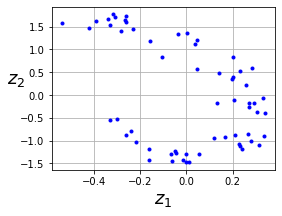

In [9]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()